In [1]:
# things Covered this notebook

# working with Yahoo Finance and importing data
# importing OHLCV data of stock of 6 Months and more or less
# importing multiple stock OHLVC data
# importing Adjusted Closing data of stocks
# importing fixed period OHLCV data of stocks
# Handling NaN values
# Saving data in CSV format
# Analysing data using Statistics
# Calculating daily return using rolling
# Ema daily return
# Visualisation
# Technical indicators implementation:
# MACD
# Bollinger band
# CAGR
# Volatility
# Sharper and sortino ratio
# Maximum drawdown
# Calmar ratio
# Getting list of stock symbol
# Importing yahoo_fin.stock_info 
# Live price of stock
# Fundamental analysis
# Valuation measure

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import yfinance as yf
data = yf.download("MSFT", period="6mo")  #this will extract data of 6 months
print(data)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-02-28  294.309998  299.140015  293.000000  298.790009  297.464294   
2022-03-01  296.399994  299.970001  292.149994  294.950012  293.641357   
2022-03-02  295.359985  301.470001  293.700012  300.190002  298.858093   
2022-03-03  302.890015  303.130005  294.049988  295.920013  294.607056   
2022-03-04  294.290009  295.660004  287.170013  289.859985  288.573914   
...                ...         ...         ...         ...         ...   
2022-08-23  276.440002  278.859985  275.399994  276.440002  276.440002   
2022-08-24  275.410004  277.230011  275.109985  275.790009  275.790009   
2022-08-25  277.329987  279.019989  274.519989  278.850006  278.850006   
2022-08-26  279.079987  280.339996  267.980011  268.089996  268.089996   
2022-08-29  265.850006  267.380005  263.950

In [4]:
data.to_csv("ohlcv_ticker_data.csv")

In [5]:
se = yf.download("MSFT", start="2020-01-01", end="2022-05-31") #this will extract data as per the date you set.
se

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,156.770004,157.770004,156.449997,157.699997,153.745209,18369400
2020-01-02,158.779999,160.729996,158.330002,160.619995,156.591995,22622100
2020-01-03,158.320007,159.949997,158.059998,158.619995,154.642166,21116200
2020-01-06,157.080002,159.100006,156.509995,159.029999,155.041885,20813700
2020-01-07,159.320007,159.669998,157.320007,157.580002,153.628265,21634100
...,...,...,...,...,...,...
2022-05-23,255.490005,261.500000,253.429993,260.649994,260.097900,33175400
2022-05-24,257.890015,261.329987,253.500000,259.619995,259.070099,29043900
2022-05-25,258.140015,264.579987,257.130005,262.519989,261.963928,28547900


In [6]:
tickers = ["AMZN", "GOOG"]
ohlvc_data = {}

for ticker in tickers:
    data = yf.download(ticker, period="1mo", interval="30m")
    ohlvc_data[ticker] = data #ohlcv_data ko data (variable) jesa download krna hai
    
print(ohlvc_data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
{'AMZN':                                  Open        High         Low       Close  \
Datetime                                                                    
2022-07-29 15:00:00-04:00  136.399994  136.479996  136.110107  136.479996   
2022-07-29 15:30:00-04:00  136.490005  136.845001  134.639999  135.000000   
2022-08-01 09:30:00-04:00  134.960007  136.990005  133.509995  136.080002   
2022-08-01 10:00:00-04:00  136.089996  138.460007  135.820007  137.270004   
2022-08-01 10:30:00-04:00  137.285004  138.833893  136.750000  138.272095   
...                               ...         ...         ...         ...   
2022-08-29 13:00:00-04:00  130.399994  130.639999  130.000000  130.349899   
2022-08-29 13:30:00-04:00  130.330002  130.750000  130.259995  130.626404   
2022-08-29 14:00:00-04:00  130.615005  130.669998  130.050003  130.219894   
2022-0

In [7]:
dmin = yf.download("MSFT", period = "1mo", interval="5m")  #interval used for to set time period like 5 min or 15 min etc.
dmin

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-07-29 15:15:00-04:00,280.989990,281.190002,280.869995,281.040009,281.040009,0
2022-07-29 15:20:00-04:00,281.029999,281.160004,280.899994,281.119995,281.119995,257405
2022-07-29 15:25:00-04:00,281.119995,281.486786,281.062805,281.460510,281.460510,294149
2022-07-29 15:30:00-04:00,281.459991,281.480011,281.149994,281.459991,281.459991,353281
2022-07-29 15:35:00-04:00,281.456909,281.662903,281.380005,281.459991,281.459991,437321
...,...,...,...,...,...,...
2022-08-29 15:00:00-04:00,265.420013,266.349915,265.394989,265.899994,265.899994,162542
2022-08-29 15:05:00-04:00,265.890015,265.890015,265.359009,265.600006,265.600006,112130
2022-08-29 15:10:00-04:00,265.600006,266.299988,265.540009,266.279999,266.279999,199780


## Getting data for multiple stocks using yfinance library

In [4]:
import yfinance as yf
import datetime as dt
import pandas as pd

stocks = ["AMZN", "MSFT", "INTC", "GOOG"]
start = dt.datetime.today()-dt.timedelta(365)
end = dt.datetime.today()
data = pd.DataFrame() #empty data frame to be filled with price.
all_data = {} #dictionary to store all data

for ticker in stocks:
    data[ticker] = yf.download(ticker, start, end) ['Adj Close']  # "Adj close"/ "Open"/"Close" means the closing price of stocks.

# for ticker in stocks:
#     all_data[ticker] = yf.download(ticker, start, end)
    
print(data)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  AMZN        MSFT       INTC        GOOG
Date                                                     
2021-09-07  175.464493  297.686829  51.937664  145.518997
2021-09-08  176.274994  297.716614  51.860214  144.883499
2021-09-09  174.207993  294.781189  51.695641  144.913498
2021-09-10  173.457504  293.253937  52.121597  141.921005
2021-09-13  172.858505  294.523346  53.234894  143.464996
...                ...         ...        ...         ...
2022-08-31  126.769997  261.470001  31.920000  109.150002
2022-09-01  127.820000  260.399994  31.760000  110.550003
2022-09-02  127.510002  256.059998  31.219999  108.680000
2022-09-06  126.110001  253.250000  30.360001  107.480003
2022-09-07  126.110001  254.

In [9]:
all_data["MSFT"] #this will print all data.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-30,301.119995,304.220001,301.059998,303.589996,301.068573,16348100
2021-08-31,304.420013,304.500000,301.500000,301.880005,299.372742,26285300
2021-09-01,302.869995,305.190002,301.489990,301.829987,299.323151,18983800
2021-09-02,302.200012,303.359985,300.179993,301.149994,298.648804,16285600
2021-09-03,300.989990,302.600006,300.260010,301.140015,298.638916,14747900
...,...,...,...,...,...,...
2022-08-23,276.440002,278.859985,275.399994,276.440002,276.440002,17527400
2022-08-24,275.410004,277.230011,275.109985,275.790009,275.790009,18137000
2022-08-25,277.329987,279.019989,274.519989,278.850006,278.850006,16583400


In [10]:
all_data["MSFT"]["Open"] #this will print all data

Date
2021-08-30    301.119995
2021-08-31    304.420013
2021-09-01    302.869995
2021-09-02    302.200012
2021-09-03    300.989990
                 ...    
2022-08-23    276.440002
2022-08-24    275.410004
2022-08-25    277.329987
2022-08-26    279.079987
2022-08-29    265.850006
Name: Open, Length: 252, dtype: float64

In [11]:
all_data["MSFT"]["Close"] #this will print all data

Date
2021-08-30    303.589996
2021-08-31    301.880005
2021-09-01    301.829987
2021-09-02    301.149994
2021-09-03    301.140015
                 ...    
2022-08-23    276.440002
2022-08-24    275.790009
2022-08-25    278.850006
2022-08-26    268.089996
2022-08-29    266.290009
Name: Close, Length: 252, dtype: float64

In [12]:
pip install yahoofinancials


Note: you may need to restart the kernel to use updated packages.


In [13]:
import yahoofinancials as yfs  #timeserie comes under yahoofinancials library

In [14]:
from yahoofinancials import YahooFinancials
ticker = "MSFT"
yahoo_financials = YahooFinancials(ticker)

In [15]:
from yahoofinancials import YahooFinancials
ticker = "MSFT"
yahoo_financials = YahooFinancials(ticker)
data = yahoo_financials.get_historical_price_data("2020-12-31", "2021-12-31", "daily")

print(data)


{'MSFT': {'eventsData': {'dividends': {'2021-02-17': {'amount': 0.56, 'date': 1613572200, 'formatted_date': '2021-02-17'}, '2021-05-19': {'amount': 0.56, 'date': 1621431000, 'formatted_date': '2021-05-19'}, '2021-08-18': {'amount': 0.56, 'date': 1629293400, 'formatted_date': '2021-08-18'}, '2021-11-17': {'amount': 0.62, 'date': 1637159400, 'formatted_date': '2021-11-17'}}}, 'firstTradeDate': {'formatted_date': '1986-03-13', 'date': 511108200}, 'currency': 'USD', 'instrumentType': 'EQUITY', 'timeZone': {'gmtOffset': -14400}, 'prices': [{'date': 1609425000, 'high': 223.0, 'low': 219.67999267578125, 'open': 221.6999969482422, 'close': 222.4199981689453, 'volume': 20942100, 'adjclose': 219.13934326171875, 'formatted_date': '2020-12-31'}, {'date': 1609770600, 'high': 223.0, 'low': 214.80999755859375, 'open': 222.52999877929688, 'close': 217.69000244140625, 'volume': 37130100, 'adjclose': 214.47909545898438, 'formatted_date': '2021-01-04'}, {'date': 1609857000, 'high': 218.52000427246094, 'l

In [16]:
pip install yahoofinancials

Note: you may need to restart the kernel to use updated packages.


In [5]:
from yahoofinancials import YahooFinancials



In [1]:
pip install TimeSeries

Note: you may need to restart the kernel to use updated packages.


In [2]:
all_tickers = ["AAPL", "MSFT", "GOOG", "FB"]
store_data = pd.DataFrame()
for ticker in all_tickers:
    ts = TimeSeries(key=open(key_path,'r').read(), output_format="pandas")
    data = ts.get_daily(symbol = ticker, outputsize = "full")[0]
    data.columns = ["open", "high", "low", "close", "volume"]
    store_data[ticker] = data["close"]

NameError: name 'pd' is not defined

## handeling NaN values


In [3]:
import datetime as dt
import yfinance as yf
import pandas as pd

stocks = ["AMZN", "MSFT", "GOOG", "FB", "U"]
start = dt.datetime.today()-dt.timedelta(1825)
end = dt.datetime.today()
cl_price = pd.DataFrame()
temp = {}

for ticker in stocks:
    cl_price[ticker] = yf.download(ticker, start, end)["Adj Close"]

print(cl_price)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FB: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
                  AMZN        MSFT        GOOG  FB          U
Date                                                         
2017-09-26   46.930000   68.838753   46.243000 NaN        NaN
2017-09-27   47.543499   69.393127   47.224499 NaN        NaN
2017-09-28   47.820000   69.411911   47.474998 NaN        NaN
2017-09-29   48.067501   69.994522   47.955502 NaN        NaN
2017-10-02   47.959499   70.107262   47.663502 NaN        NaN
...                ...         ...         ...  ..        ...
2022-09-19  124.660004  244.520004  103.849998 NaN  36.860001
2022-09-20  122.190002  242.44999

# Save data in excel formate

In [4]:
cl_price.to_csv("Data_set_of_ticker.csv")

In [5]:
#filling NaN values:
cl_price.fillna(0)

,AMZN,MSFT,GOOG,FB,U
Date,,,,,
2017-09-26,46.930000,68.838753,46.243000,0.0,0.000000
2017-09-27,47.543499,69.393127,47.224499,0.0,0.000000
2017-09-28,47.820000,69.411911,47.474998,0.0,0.000000
2017-09-29,48.067501,69.994522,47.955502,0.0,0.000000
2017-10-02,47.959499,70.107262,47.663502,0.0,0.000000
...,...,...,...,...,...
2022-09-19,124.660004,244.520004,103.849998,0.0,36.860001
2022-09-20,122.190002,242.449997,101.830002,0.0,35.200001
2022-09-21,118.540001,238.949997,100.010002,0.0,34.900002


In [6]:
cl_price.fillna({"FB": 0, "U":0})

,AMZN,MSFT,GOOG,FB,U
Date,,,,,
2017-09-26,46.930000,68.838753,46.243000,0.0,0.000000
2017-09-27,47.543499,69.393127,47.224499,0.0,0.000000
2017-09-28,47.820000,69.411911,47.474998,0.0,0.000000
2017-09-29,48.067501,69.994522,47.955502,0.0,0.000000
2017-10-02,47.959499,70.107262,47.663502,0.0,0.000000
...,...,...,...,...,...
2022-09-19,124.660004,244.520004,103.849998,0.0,36.860001
2022-09-20,122.190002,242.449997,101.830002,0.0,35.200001
2022-09-21,118.540001,238.949997,100.010002,0.0,34.900002


In [7]:
cl_price.fillna(method="bfill") # this prints the last value of stock.

,AMZN,MSFT,GOOG,FB,U
Date,,,,,
2017-09-26,46.930000,68.838753,46.243000,NaN,68.349998
2017-09-27,47.543499,69.393127,47.224499,NaN,68.349998
2017-09-28,47.820000,69.411911,47.474998,NaN,68.349998
2017-09-29,48.067501,69.994522,47.955502,NaN,68.349998
2017-10-02,47.959499,70.107262,47.663502,NaN,68.349998
...,...,...,...,...,...
2022-09-19,124.660004,244.520004,103.849998,NaN,36.860001
2022-09-20,122.190002,242.449997,101.830002,NaN,35.200001
2022-09-21,118.540001,238.949997,100.010002,NaN,34.900002


## Statistics

In [8]:
cl_price.mean()

AMZN    117.410139
MSFT    181.934478
GOOG     83.563431
FB             NaN
U       102.382323
dtype: float64

In [9]:
cl_price.std()

AMZN    38.212730
MSFT    78.873504
GOOG    32.115016
FB            NaN
U       38.229837
dtype: float64

In [10]:
cl_price.median()

AMZN    102.497498
MSFT    168.681976
GOOG     69.420502
FB             NaN
U       102.825001
dtype: float64

In [11]:
cl_price.describe()

,AMZN,MSFT,GOOG,FB,U
count,1258.000000,1258.000000,1258.000000,0.0,508.000000
mean,117.410139,181.934478,83.563431,NaN,102.382323
std,38.212730,78.873504,32.115016,NaN,38.229837
min,46.930000,68.838753,46.243000,NaN,30.299999
25%,87.184252,104.877928,56.904750,NaN,84.754999
50%,102.497498,168.681976,69.420502,NaN,102.825001
75%,158.093746,253.185093,113.340628,NaN,129.715004
max,186.570496,340.882782,150.709000,NaN,201.119995


In [12]:
#to print first 5 rows
print("first 5 rows")
cl_price.head(100)

first 5 rows


,AMZN,MSFT,GOOG,FB,U
Date,,,,,
2017-09-26,46.930000,68.838753,46.243000,NaN,NaN
2017-09-27,47.543499,69.393127,47.224499,NaN,NaN
2017-09-28,47.820000,69.411911,47.474998,NaN,NaN
2017-09-29,48.067501,69.994522,47.955502,NaN,NaN
2017-10-02,47.959499,70.107262,47.663502,NaN,NaN
...,...,...,...,...,...
2018-02-12,69.311501,84.171593,52.597000,NaN,NaN
2018-02-13,70.725502,84.832657,52.605000,NaN,NaN
2018-02-14,72.552498,86.160973,53.485001,NaN,NaN


In [13]:
print("bottom 5 rows")
cl_price.tail() #nothing mentioned here it will give 5 rows

bottom 5 rows


,AMZN,MSFT,GOOG,FB,U
Date,,,,,
2022-09-19,124.660004,244.520004,103.849998,NaN,36.860001
2022-09-20,122.190002,242.449997,101.830002,NaN,35.200001
2022-09-21,118.540001,238.949997,100.010002,NaN,34.900002
2022-09-22,117.309998,240.979996,100.570000,NaN,33.320000
2022-09-23,113.779999,237.919998,99.169998,NaN,33.250000


In [14]:
daily_retur = cl_price.pct_change() #this will print change in %
daily_retur

,AMZN,MSFT,GOOG,FB,U
Date,,,,,
2017-09-26,NaN,NaN,NaN,NaN,NaN
2017-09-27,0.013073,0.008053,0.021225,NaN,NaN
2017-09-28,0.005816,0.000271,0.005304,NaN,NaN
2017-09-29,0.005176,0.008394,0.010121,NaN,NaN
2017-10-02,-0.002247,0.001611,-0.006089,NaN,NaN
...,...,...,...,...,...
2022-09-19,0.009148,-0.000899,0.002123,NaN,0.037141
2022-09-20,-0.019814,-0.008466,-0.019451,NaN,-0.045035
2022-09-21,-0.029872,-0.014436,-0.017873,NaN,-0.008523


In [15]:
# another way to calculate daily return
daily_return = cl_price/cl_price.shift(1) - 1 #this will return daily return
daily_return

,AMZN,MSFT,GOOG,FB,U
Date,,,,,
2017-09-26,NaN,NaN,NaN,NaN,NaN
2017-09-27,0.013073,0.008053,0.021225,NaN,NaN
2017-09-28,0.005816,0.000271,0.005304,NaN,NaN
2017-09-29,0.005176,0.008394,0.010121,NaN,NaN
2017-10-02,-0.002247,0.001611,-0.006089,NaN,NaN
...,...,...,...,...,...
2022-09-19,0.009148,-0.000899,0.002123,NaN,0.037141
2022-09-20,-0.019814,-0.008466,-0.019451,NaN,-0.045035
2022-09-21,-0.029872,-0.014436,-0.017873,NaN,-0.008523


In [16]:
daily_return.mean()

AMZN    0.000943
MSFT    0.001165
GOOG    0.000786
FB           NaN
U      -0.000024
dtype: float64

In [17]:
daily_return.std() #volatility 

AMZN    0.021837
MSFT    0.018870
GOOG    0.018942
FB           NaN
U       0.052048
dtype: float64

In [18]:
daily_return.mean(axis = 1) #show data of every row

Date
2017-09-26         NaN
2017-09-27    0.014117
2017-09-28    0.003797
2017-09-29    0.007897
2017-10-02   -0.002242
                ...   
2022-09-19    0.011878
2022-09-20   -0.023191
2022-09-21   -0.017676
2022-09-22   -0.010388
2022-09-23   -0.014703
Length: 1258, dtype: float64

## for simple average

In [ ]:
daily_return.rolling(window=10).mean() #this will not generate output for 1st 10 rows, because there is no more rows before


## For EMA ( Exponential Moving Average )

In [ ]:
daily_return.ewm(com=10, min_periods=10).mean() #Minimum number of observations in window required to have a value.

## visualization 


In [ ]:
cl_price.plot()

In [ ]:
cl_price.plot(subplots=True, layout = (3,3))

In [ ]:
cl_price.plot(title = "Stock Price", xlabel = "Years", ylabel = "Price")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
list_1 = ['rsi',
 'stochastic_rsi',
 'stochastic_fast',
 'stochastic_slow',
 'adx',
 'adr',
 'adr_percent',
 'adxr',
 'apo',
 'momentum',
 'ultimate_oscillator',
 'roc_ratio',
 'atr',
 'atr_percent',
 'relative_volatility',
 'daily_volatility',
 'natr',
 'true_range',
 'macd_level',
 'macd_signal',
 'macd_hist',
 'mom',
 'aroon_up',
 'aroon_down',
 'balance_of_power',
 'keltner_channel_upper_band',
 'keltner_channel_lower_band',
 'positive_di',
 'negative_di',
 'kama',
 'ppo',
 'ppo_signal_line',
 'ppo_hist',
 'pvo',
 'pvo_signal_line',
 'pvo_hist',
 'psar',
 'elder_green_bar',
 'elder_red_bar',
 'elder_blue_bar',
 'cci',
 'cmo',
 'below_lower_keltner_channel',
 'dpo',
 'bullish_macd_crossover',
 'oversold_with_improving_rsi',
 'moved_above_upper_keltner_channel',
 'cci_buy_signal',
 'parabolic_sar_buy',
 'aroon_osc',
 'in_new_uptrend_aroon',
 'in_new_uptrend_adx',
 'bearish_macd_crossover',
 'overbought_with_declining_rsi',
 'moved_below_lower_keltner_channel',
 'cci_sell_signal',
 'parabolic_sar_sell',
 'in_new_downtrend_aroon',
 'in_new_downtrend_adx',
 'chandelier_exit_long',
 'chandelier_exit_short',
 'beta',
 'correl',
 'linear_reg',
 'linear_reg_angle',
 'linear_reg_intercept',
 'linear_reg_slope',
 'time_series_forecase',
 'variance',
 'double_exponential_moving_avg',
 'hilbert_transform_trendline',
 'mesa_adaptive_moving_avg',
 'moving_avg_variable_period',
 'moving_avg_variable_period',
 'midpoint',
 'midprice',
 'typical_price',
 'weighted_close_price',
 'parabolic_sar_extended',
 'triple_exponential_moving_average',
 'triangular_moving_avg',
 'weighted_moving_avg',
 'hilbert_transform_dominant_cycle_period',
 'hilbert_transform_dominant_cycle_phase',
 'hilbert_transform_dominant_cycle_phaser_components',
 'hilbert_transform_sinewave',
 'hilbert_transform_trend_mode',
 'macd_fast',
 'macd_slow',
 'accDist',
 'accDist_signal',
 'chaikin_oscillator',
 'nvi',
 'nvi_signal',
 'obv',
 'trix',
 'trix_signal',
 'tsi',
 'tsi_signal_line',
 'ulcer',
 'vtx_plus',
 'vtx_minus',
 'declining_cmf',
 'cmf',
 'improving_cmf']

In [ ]:
len(list_1)
list_2 = []

In [ ]:
for fn in list_1:
    list_2.append(fn.replace("_", " "))

In [ ]:
list_2

## Technical Indicators Implementation

ticker = ["AMZN", "MSFT", "GOOG"]
ohlcv_data = {}

for ticker in ticker:
    data = yf.download(ticker, period="1mo", interval="15m")
    data.dropna(how = "any", inplace=True)
    ohlcv_data[ticker] = data

print(ohlcv_data)


## MACD implementation

In [ ]:
df = yf.download('TSLA', start="2020-01-01")#["Close"]

In [ ]:
def MACD(df):
    df["EMA12"] = df.Close.ewm(span=12).mean()
    df["EMA26"] = df.Close.ewm(span=26).mean()
    df["MACD"] = df["EMA12"] - df["EMA26"]
    df["Signal"] = df.MACD.ewm(span=9).mean() 
    print("MACD inplemented")

In [ ]:
MACD(df)
df

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import datetime as dt
import yfinance as yf
import pandas as pd

stocks = ["AMZN", "MSFT", "GOOG","U"]
# start = dt.datetime.today()-dt.timedelta(1825)
# end = dt.datetime.today()
cl_price = pd.DataFrame()


for ticker in stocks:
    cl_price[ticker] = yf.download(ticker, "2022-01-01", "2022-03-31")["Adj Close"]

print(cl_price)

In [ ]:
tickers = ["AMZN", "MSFT", "GOOG", "FB", "U"]
ohlcv = []

for ticker in tickers:
    data = yf.download(ticker, period = "6mo", interval = "1d")
    ohlcv["ticker"] = data

print(ohlcv)

In [ ]:
ohlcv.to_csv("Ticker_ohlvc_data.csv")

# Bollinger Band Implementataion


In [ ]:
tickers = ["AMZN", "GOOG"]
ohlvc_data = {}

for ticker in tickers:
    data = yf.download(ticker, period="1mo", interval="15m")
    ohlvc_data[ticker] = data  # ohlcv_data ko data (variable) jesa download krna hai

def BB(DF, n=14):
    df = DF.copy() #to the dataFrame that we are importing
    df["MB"] = df["Adj Close"].rolling(n).mean()
    df["UB"] = df["MB"] + 2 * df["Adj Close"].rolling(n).std(ddpf=0) #  ddpf=0 to calculate the Std
    df["LB"] = df["MB"] - 2 * df["Adj Close"].rolling(n).std(ddpf=0)
    df["BB_Widht"] = df["UB"] - df["LB"]
    return df[["MB", "UB", "LB", "BB_Widht"]]

for ticker in ohlvc_data:
    ohlvc_data[ticker][["MB", "UB", "LB", "BB_Widht"]] = BB(ohlvc_data[ticker],20)
    
print(ohlvc_data)

# CAGR Implementataion

In [ ]:
# this is specifically for one ticker

tickers = ["AMZN", "GOOG", "U"]
ohlvc_data = {}

for ticker in tickers:
    data = yf.download(ticker, period="24mo", interval="1d")
    ohlvc_data[ticker] = data  # ohlcv_data ko data (variable) jesa download krna hai

df = ohlvc_data["AMZN"].copy()
df["return"] = df["Adj Close"].pct_change() #daily return
df["Compounded_return"] = (1+df["return"]).cumprod()
n = len(df)/252  #total we have 252 trading days in a year
CAGR = (df["Compounded_return"][-1])**(1/n)-1

print("The CAGR is =",CAGR)  # this is the negative CAGR

In [ ]:
# this is specifically for all the ticke in that list

def CAGR(DF):
    df = DF.copy()
    df["return"] = df["Adj Close"].pct_change()         #daily return
    df["Compounded_return"] = (1+df["return"]).cumprod()
    n = len(df)/252
    CAGR = (df["Compounded_return"][-1])**(1/n)-1       #formula to calculate "CAGR"
    return CAGR

for ticker in ohlvc_data:
    print("CAGR of {} = {}".format(ticker, CAGR(ohlvc_data[ticker])))
#print("The CAGR is =",CAGR)  # this is the negative CAGR

In [ ]:
stocks = ["AMZN", "GOOG", "MSFT"]
ohlvc = {}

for ticker in stocks:
    data = yf.download(ticker, period="3mo", interval="1d")
    data.dropna(how="any", inplace=True)
    ohlvc[ticker] = data

# volatility implementation

In [ ]:
tickers = ["AMZN", "GOOG", "MSFT"]
ohlvc = {}

for ticker in tickers:
    data = yf.download(ticker, period="6mo", interval="1d")
    data.dropna(how="any", inplace=True)
    ohlvc[ticker] = data

def volatility(DF):
    df = DF.copy()  # we are copying the data of all the ticker in that list. 
    df["return"] = df["Adj Close"].pct_change()
    volt = df["return"].std() * np.sqrt(252) #252 because we are looking for 1D Timeframe (total trading days in a year)
    return volt

for ticker in ohlvc:
    print("Volatility of {} is {}".format(ticker, volatility(ohlvc[ticker])))


# Sharpe Ratio and Sortino Ratio

In [ ]:
tickers = ["AMZN", "GOOG", "MSFT"]
ohlvc = {}

for ticker in tickers:
    data = yf.download(ticker, period="6mo", interval="1d")
    data.dropna(how="any", inplace=True)
    ohlvc[ticker] = data

def CAGR(DF):
    df = DF.copy()
    df = df.copy()
    df["return"] = df["Adj Close"].pct_change() #daily return
    df["Compounded_return"] = (1+df["return"]).cumprod()
    n = len(df)/252
    CAGR = (df["Compounded_return"][-1])**(1/n)-1
    return CAGR

def volatility(DF):
    df = DF.copy()
    df["return"] = DF["Adj Close"].pct_change()
    volt = df["return"].std() * np.sqrt(252) #252 because we are looking for 1D data frame (total tradind days in a year)
    return volt
#
# #here to define the sharpe ratio function and done!!!!
#
def shapre(DF, rf):
    df = DF.copy()
    return (CAGR(df) - rf)/volatility(df)

# now to define the sortino fucntion

def sortino(DF, rf):
    df = DF.copy()
    df["return"] = df["Adj Close"].pct_change()
    negative_return = np.where(df["return"]>0,0,df["return"])
    negative_volatility = pd.Series(negative_return[negative_return!=0]).std() * np.sqrt(252)# this to filer out the 0 values
    return (CAGR(df) - rf)/negative_volatility

for ticker in ohlvc:
    print("shapre for {} = {}".format(ticker,shapre(ohlvc[ticker],0)))
    print("sortino for {} = {}".format(ticker, sortino(ohlvc[ticker], 0)))

# Maximum Drawdown (maximum kitna gira hai) & Calmar Ratio

In [ ]:
tickers = ["AMZN", "GOOG"]
ticker_data = {}

for ticker in tickers:
    data = yf.download(ticker, period="3mo", interval="1d")
    data.dropna(how="any", inplace=True)
    ticker_data[ticker] = data



In [ ]:
def max_dd(DF):
    df = DF.copy()   
    df["return"] = df["Adj Close"].pct_change()  # to get the daily return
    df["compound_return"] = (1+df["return"]).cumprod()  #to get the daily compound return
    df["compound_roll_max"] = df["compound_return"].cummax()  #to record the maximum value
    df["draw_down"] = df["compound_roll_max"] - df["compound_return"]
    return (df["draw_down"]/df["compound_roll_max"]).max()  #draw down percentage and we add max just to know the maximum value

In [ ]:
for ticker in ticker_data:      
    print("max drawdown of {} = {}".format(ticker, max_dd(ticker_data[tickers])))

# Get List of all the stock listed in NSE

In [2]:
pip install yahoo-fin

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yahoo_fin.stock_info as yf

In [4]:
yf.tickers_nifty50()  # OR     si.tickers_sp500()       si.tickers_nifty50()  

['APOLLOHOSP.NS',
 'BAJAJ-AUTO.NS',
 'BAJAJFINSV.NS',
 'BAJFINANCE.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'ICICIBANK.NS',
 'INDUSINDBK.NS',
 'ITC.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'MARUTI.NS',
 'MM.NS',
 'NESTLEIND.NS',
 'NTPC.NS',
 'ONGC.NS',
 'RELIANCE.NS',
 'SHREECEM.NS',
 'TATACONSUM.NS',
 'TATASTEEL.NS',
 'TCS.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

In [5]:
# to print all the price data of a particular stocks from starting and the time frame will be "1D"

dow = yf.tickers_dow()

data = {}  #to store the data of dow
for ticker in dow:
    data[ticker] = yf.get_data(ticker)


In [6]:
dow

['AAPL',
 'AMGN',
 'AXP',
 'BA',
 'CAT',
 'CRM',
 'CSCO',
 'CVX',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'V',
 'VZ',
 'WBA',
 'WMT']

In [ ]:
data["AAPL"]

In [ ]:
data.keys()

# Get option data

In [ ]:
from yahoo_fin import options

In [ ]:
df = yf.get_data("GOOG", start_date="2004-08-19", end_date="2005-08-19", interval="1d")
df

In [ ]:
df["adjclose"]

In [ ]:
option_chain = options.get_options_chain("GOOG")
option_chain

In [ ]:
# if you want to know about the put side

option_chain.keys()

In [ ]:
# to get the calls side data

option_chain["calls"]

# Live price

In [ ]:
yf.get_live_price("GOOG")

# Fundamental data of tickers

## Cash_Flow

In [ ]:
google_cashflow = yf.get_cash_flow("GOOG")
google_cashflow

In [ ]:
google_cashflow.loc["netIncome"]

## Balance Sheet

In [ ]:
balance_sheet = yf.get_balance_sheet("GOOG")
balance_sheet


In [ ]:
balance_sheet.loc["inventory"]

## Company Officers


In [ ]:
yf.get_company_officers("GOOG")


## Shares_Holders

In [ ]:
yf.get_holders("GOOG")

## Income_Statement

In [ ]:
income_statement = yf.get_income_statement("GOOG")
income_statement

## Financials

In [22]:
import yahoo_fin.stock_info as si
import pandas as pd

In [23]:
analyst = si.get_analysts_info("GOOG")
analyst

{'Earnings Estimate':   Earnings Estimate  Current Qtr. (Sep 2022)  Next Qtr. (Dec 2022)  \
 0   No. of Analysts                    32.00                 31.00   
 1     Avg. Estimate                     1.26                  1.41   
 2      Low Estimate                     1.17                  1.27   
 3     High Estimate                     1.47                  1.71   
 4      Year Ago EPS                     1.40                  1.53   
 
    Current Year (2022)  Next Year (2023)  
 0                34.00             38.00  
 1                 5.11              5.88  
 2                 4.69              4.85  
 3                 5.62              6.54  
 4                 5.61              5.11  ,
 'Revenue Estimate':           Revenue Estimate Current Qtr. (Sep 2022) Next Qtr. (Dec 2022)  \
 0          No. of Analysts                      29                   29   
 1            Avg. Estimate                  70.98B               80.21B   
 2             Low Estimate           

In [24]:
analyst.keys()

dict_keys(['Earnings Estimate', 'Revenue Estimate', 'Earnings History', 'EPS Trend', 'EPS Revisions', 'Growth Estimates'])

In [25]:
analyst['EPS Trend']

,EPS Trend,Current Qtr. (Sep 2022),Next Qtr. (Dec 2022),Current Year (2022),Next Year (2023)
0,Current Estimate,1.26,1.41,5.11,5.88
1,7 Days Ago,1.26,1.40,5.11,5.88
2,30 Days Ago,1.27,1.40,5.19,5.98
3,60 Days Ago,28.43,31.65,111.33,131.87
4,90 Days Ago,28.75,31.92,111.53,132.36


In [26]:
analyst["Growth Estimates"]

,Growth Estimates,GOOG,Industry,Sector(s),S&P 500
0,Current Qtr.,-10.00%,NaN,NaN,NaN
1,Next Qtr.,-7.80%,NaN,NaN,NaN
2,Current Year,-8.90%,NaN,NaN,NaN
3,Next Year,15.10%,NaN,NaN,NaN
4,Next 5 Years (per annum),13.65%,NaN,NaN,NaN
5,Past 5 Years (per annum),30.78%,NaN,NaN,NaN


In [27]:
si.get_splits("GOOG")

,splitRatio,ticker
2014-03-27,2002:1000,GOOG
2015-04-27,10027455:10000000,GOOG
2022-07-18,20:1,GOOG


# Stock value measures compaison

In [31]:
import yahoo_fin.stock_info as si
import yfinance as yf

In [40]:
yf.Ticker("GOOG").financials

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Research Development,31562000000.0,27573000000.0,26018000000.0,21419000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,90734000000.0,48082000000.0,39625000000.0,34913000000.0
Minority Interest,None,None,None,None
Net Income,76033000000.0,40269000000.0,34343000000.0,30736000000.0
Selling General Administrative,36422000000.0,28998000000.0,28015000000.0,23256000000.0
Gross Profit,146698000000.0,97795000000.0,89961000000.0,77270000000.0
Ebit,78714000000.0,41224000000.0,35928000000.0,32595000000.0
Operating Income,78714000000.0,41224000000.0,35928000000.0,32595000000.0
Other Operating Expenses,None,None,None,None


# Get multiple stocks fianancial data

In [33]:
tickers = ["GOOG", "MSFT", "IBM"]


In [34]:
import time

In [41]:
infos = []
start = time.time()   #just to know how much time taken to run that code
for stocks in tickers:
    infos.append(yf.Ticker(stocks).financials)
print("time taken", time.time() - start)
infos

time taken 11.418964147567749


[                                            2021-12-31      2020-12-31  \
 Research Development                     31562000000.0   27573000000.0   
 Effect Of Accounting Charges                      None            None   
 Income Before Tax                        90734000000.0   48082000000.0   
 Minority Interest                                 None            None   
 Net Income                               76033000000.0   40269000000.0   
 Selling General Administrative           36422000000.0   28998000000.0   
 Gross Profit                            146698000000.0   97795000000.0   
 Ebit                                     78714000000.0   41224000000.0   
 Operating Income                         78714000000.0   41224000000.0   
 Other Operating Expenses                          None            None   
 Interest Expense                          -346000000.0    -135000000.0   
 Extraordinary Items                               None            None   
 Non Recurring           

In [36]:
fundamental = ["dividendYield", "beta", "marketCap", "forwardPE"]  #to know the fundamentals of stocks
df = pd.DataFrame(infos)  #to make better comparison
df = df.set_index("symbol")  # adding another index for "Symbol"
df

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,tradeable,dividendYield,bidSize,dayHigh,coinMarketCapLink,regularMarketPrice,preMarketPrice,logo_url,trailingPegRatio,fax
symbol,,,,,,,,,,,,,,,,,,,,,
GOOG,94043,Communication Services,174014,Alphabet Inc. provides various products and pl...,Mountain View,650 253 0000,CA,United States,[],https://www.abc.xyz,...,False,NaN,1400,111.9433,None,110.34,111.86,https://logo.clearbit.com/abc.xyz,1.5881,NaN
MSFT,98052-6399,Technology,221000,"Microsoft Corporation develops, licenses, and ...",Redmond,425 882 8080,WA,United States,[],https://www.microsoft.com,...,False,0.0094,1000,267.3800,None,265.23,268.05,https://logo.clearbit.com/microsoft.com,1.9900,425 706 7329
IBM,10504,Technology,282100,International Business Machines Corporation pr...,Armonk,914 499 1900,NY,United States,[],https://www.ibm.com,...,False,0.0506,800,131.4200,None,130.31,130.94,https://logo.clearbit.com/ibm.com,1.7625,NaN


In [37]:
# to get columns of fundamental
df[df.columns[df.columns.isin(fundamental)]]

,beta,forwardPE,marketCap,dividendYield
symbol,,,,
GOOG,1.078487,18.765305,1432941494272,NaN
MSFT,0.927206,22.213570,1978056179712,0.0094
IBM,0.852785,12.914766,116799455232,0.0506


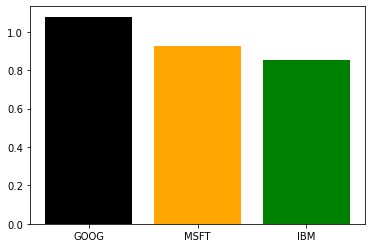

In [38]:
plt.bar(df.index,df.beta, color=("black", "orange", "green"))
plt.show()

In [1]:
stocks_list = yf.tickers_nifty50()
stocks_list

NameError: name 'yf' is not defined

In [ ]:
import yfinance as yf

In [ ]:
infos = []

for i in stocks_list:
    infos.append(yf.Ticker(i).info)


In [ ]:
df1 = pd.DataFrame(infos)
df1 = df1.set_index('symbol')
df1

In [ ]:
df1.keys()

In [ ]:
df1.to_csv("Df1_data.csv")

In [ ]:
si.get_stats("TATASTEEL.NS")

In [ ]:
df1["dividendYield"].nlargest(5)

In [ ]:
df1[['shortName', 'dividendYield']]

In [ ]:
plt.rcParams['figure.figsize'] = [15, 5]  #to increase the chart size
df1.plot(x='shortName', y='dividendYield', kind='bar')  # to plot dividendYield and stocks name
plt.xticks(rotation=90)  #to rotate the chart
plt.show()

# Stock is under values or over valued

In [2]:
# import libraries that we are using

import pandas as pd
import numpy as np
import yahoo_fin as yf

In [3]:
# import financial data
df = pd.read_csv("C:/Users/asus/OneDrive/Desktop/Df1.csv")

In [4]:
# set index
df.set_index("symbol")

,PE,currentPrice,EPS
symbol,,,
APOLLOHOSP.NS,51.657480,4215.25,81.60
BAJAJ-AUTO.NS,23.679476,4054.40,171.22
BAJAJFINSV.NS,51.000000,16286.00,49.41
BAJFINANCE.NS,50.000000,7062.10,138.00
BHARTIARTL.NS,73.000000,730.85,9.96
BRITANNIA.NS,44.858670,3650.15,81.37
CIPLA.NS,21.563160,1020.80,47.34
COALINDIA.NS,9.042469,229.95,25.43
HDFCLIFE.NS,89.984130,566.90,6.30


In [5]:
# mean PE ratio of nifty50
PE_mean = df.PE.mean()
PE_mean

37.436665613793096

In [6]:
# calculate the fare market value
df["Fair_market_value"] = PE_mean * df["EPS"]

In [7]:
df

,symbol,PE,currentPrice,EPS,Fair_market_value
0,APOLLOHOSP.NS,51.657480,4215.25,81.60,3054.831914
1,BAJAJ-AUTO.NS,23.679476,4054.40,171.22,6409.905886
2,BAJAJFINSV.NS,51.000000,16286.00,49.41,1849.745648
3,BAJFINANCE.NS,50.000000,7062.10,138.00,5166.259855
4,BHARTIARTL.NS,73.000000,730.85,9.96,372.869190
5,BRITANNIA.NS,44.858670,3650.15,81.37,3046.221481
6,CIPLA.NS,21.563160,1020.80,47.34,1772.251750
7,COALINDIA.NS,9.042469,229.95,25.43,952.014407
8,HDFCLIFE.NS,89.984130,566.90,6.30,235.850993
9,HEROMOTOCO.NS,21.000000,2826.75,132.65,4965.973694


In [ ]:
# to show companies value ratio to determine if that company is overvalued or under valued

#here 1 is 100, if ratio is less than 1 i.e. 0.63 (stock is in 37% discount)
# if rario is more than 1 ,i.e 1.37 than stock is 37% over valued


df["Over_under_ratio"] = df["currentPrice"] / df["Fair_market_value"]

In [ ]:
df

In [ ]:
# create a column to show the label of stock which is under valued or over valued
df["value_label"] = np.where(df['Over_under_ratio'] < 1.0, "Under Valued", "Over Valued" )
df

In [ ]:
# #percetage of stocks are under valued or over valued
df["Value_percentage"] = abs(df["Over_under_ratio"]-1)*100
df

In [ ]:
# list of stocks that are consider as under valued
df[df.value_label == "Under_valued"].index

# Piotroski F- Score 

In [ ]:
# Profitability Criteria:
# Positive return on assets in the current year (1 point)
# Positive operating cash flow in the current year (1 point)
# Return on assets higher in current year compared to previous year (1 point)
# Cash flow from operations divided by total assets greater than ROA in current year (Accruals) (1 point)

# Leverage, Liquidity and Source of Funds Criteria:
# Lower ratio of long term debt in the current period, compared to the previous year (decreased leverage) (1 point)
# Higher current ratio this year compared to the previous year (more liquidity) (1 point)
# No new shares were issued in the last year (lack of dilution) (1 point)

# Operating Efficiency Criteria:
# A higher gross margin compared to the previous year (1 point)
# A higher asset turnover ratio compared to the previous year (1 point)
